### This kernel is my submission to the House Prices: Advanced Regression Technique tutorial dataset. It's my first time making a IPython notebook or working with Kaggle datasets so it's mostly for learning's sake and will follow the practices of others, but I'm excited to see what results it'll get.

The steps I will walk through are:
1. Data Summarization
2. Data Cleaning
3. Data Exploration
4. Feature Engineering
5. Trying different algorithms (current planned: linear & logistic regression, SVM, random forests)
6. Comparing accuracy rates

In [1]:
#package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Summarization

In [3]:
#train = pd.read_csv('../input/train.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
#test = pd.read_csv('../input/test.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

### Observations:
- One response variable, SalePrice
- Only 7 houses have pools, with PoolArea != 0 and PoolQC not NaN
- Only ~271 houses have fences, 91 have alleys, 54 "MiscFeature", 770 fireplaces
- Lower amts of null vals in LotFrontage, MasVnrType, MasVnrArea, BsmtQual, BsmtCont, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, Electrical, FireplaceQu, garage quals (GarageCars and GarageArea are 0 when other garage quals are null)
- Test cols that are missing data: LotFrontage, Alley, Utilities, Exterior1st and 2nd, MasVnrType and Area, Bsmt qualities, Garage qualities, Functional, FireplaceQu, Pool quals, Fence, Misc quals, SaleType

# 2. Data Exploration

Checking classes for skew. Uh...guess I'll just analyze EVERY categorical variable.

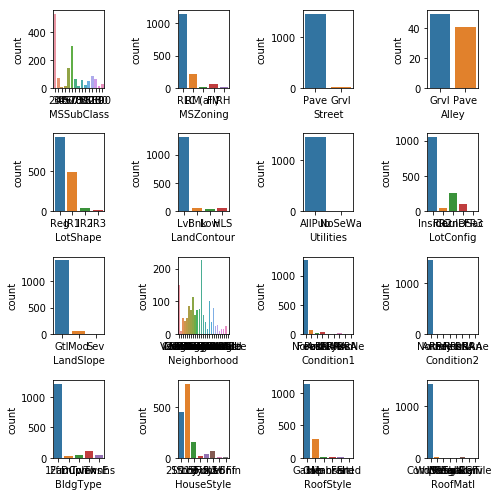

In [10]:
f, axes = plt.subplots(4,4,figsize=(7,7))
sns.countplot(train.MSSubClass,ax=axes[0,0])
sns.countplot(train.MSZoning,ax=axes[0,1])
sns.countplot(train.Street,ax=axes[0,2])
sns.countplot(train.Alley,ax=axes[0,3])
sns.countplot(train.LotShape,ax=axes[1,0])
sns.countplot(train.LandContour,ax=axes[1,1])
sns.countplot(train.Utilities,ax=axes[1,2])
sns.countplot(train.LotConfig,ax=axes[1,3])
sns.countplot(train.LandSlope,ax=axes[2,0])
sns.countplot(train.Neighborhood,ax=axes[2,1])
sns.countplot(train.Condition1,ax=axes[2,2])
sns.countplot(train.Condition2,ax=axes[2,3])
sns.countplot(train.BldgType,ax=axes[3,0])
sns.countplot(train.HouseStyle,ax=axes[3,1])
sns.countplot(train.RoofStyle,ax=axes[3,2])
sns.countplot(train.RoofMatl,ax=axes[3,3])
f.tight_layout()
plt.show()

# 2. Data Cleaning

Certain features being missing would be significant to a buyer's judgement. Therefore, we will fill in those in with 0s for NaN values to represent absence. Even the categorical values are filled with 0s, seeing as the other categories will be changed to ints for regression anyways.

In [ ]:
train.fillna(0,inplace=True)
test.fillna(0,inplace=True)

Check to ensure no null values remain.

In [ ]:
print("Train Null Values")
print(train.isnull().sum().sum())
print("Test Null Values")
print(test.isnull().sum().sum())

So prior to this, I tried manually analyzing and picking out features to remove. That is a pain. Let's experiment instead with four sklearn methods of feature streamlining: SelectKBest, RFE, PCA, and Extra Trees.

### Desired Number of Features

Let's take a look at the features of our data:

In [ ]:
train.info()

ID is not a feature, so removing that we have 80 features. Skimming over and looking at the number of keyword redundancies we can first estimate that we could do with just 1/4rd (20) of the present features. This figure can be adjusted later.

In [ ]:
train.drop(columns='Id',inplace=True)

### First Run

We're first going to run the random forests model to see how bad overfitting is currently, and to get the importance of each feature in order to take the top 20.

In [ ]:
from sklearn.model_selection import train_test_split
train = pd.get_dummies(train)
X = train.drop(columns='SalePrice')
y = train.SalePrice
X_train,X_val,y_train,y_val = train_test_split(X,y,random_state=0)

Importing packages:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error

Setting up, fitting and measuring accuracy of model:

In [ ]:
def rfwithval(xt, yt, xv, yv,maxfeat="auto",maxnd=None,maxdp=None,ntrees=10):
    forest = RandomForestClassifier(random_state=1,max_features=maxfeat,max_leaf_nodes=maxnd,max_depth=maxdp,n_estimators=ntrees)
    forest.fit(xt, yt)
    train_predictions = forest.predict(xt)
    val_predictions = forest.predict(xv)
    print("Training MAE: {} | Validation MAE: {}"\
          .format(mean_absolute_error(yt,train_predictions),mean_absolute_error(yv,val_predictions)))
    return forest
    
forest = rfwithval(X_train,y_train,X_val,y_val)

So there's room for improvement. Let's see if we can fix this by fiddling with maximum features sampled, maximum leaf nodes, maximum tree depth, and number of trees.

# 3. Tuning the Random Forest

### Features Sampled

In [ ]:
feats = [4,8,16,32,64]
for item in feats:
    print("{} features sampled".format(item))
    forest1 = rfwithval(X_train,y_train,X_val,y_val,maxfeat=item)

Not much of a difference is made.

### Leaf Nodes

In [ ]:
nds = [3,30,300,3000,30000]
for item in nds:
    print("{} nodes".format(item))
    forest1 = rfwithval(X_train,y_train,X_val,y_val,maxnd=item)

Maximum 300 leaf nodes minimizes validation MAE substantially but also is far from the minimum training MAE.

### Depth

In [ ]:
dps = [3,9,27,81,243]
for item in dps:
    print("{} depth".format(item))
    forest1 = rfwithval(X_train,y_train,X_val,y_val,maxdp=item)

Maximum depth of 27 minimizes validation MAE substantially and does not have minimum training MAE but has not as bad of an increase.

### Number of Trees

In [ ]:
nums = [5,10,20,40,80]
for item in nums:
    print("{} trees".format(item))
    forest1 = rfwithval(X_train,y_train,X_val,y_val,ntrees=item)

Increasing the number of trees eliminates training MAE but doesn't do much for validation MAE, and also increases training time substantially.

## Another Idea: Using the Feature Rankings from RandomForestClassifier

Another way to reduce overfitting is by reducing the number of features input into the model. When a random forest classifier is fit, it also assigns an importance score to each feature. Let's see if we can reduce overfitting by only taking n highest importance features.

In [ ]:
#Get scores of features
imps = forest.feature_importances_

In [ ]:
def featurereducedforest(df, imps, cut):
    #Get cutoff for top n scores
    cutoff = min(sorted(imps)[-cut:])
    #Get indexes of top n
    inds = [i for i in range(len(imps)) if imps[i]>=cutoff]
    newdict = {i:df.iloc[:,i] for i in inds}
    train1 = pd.DataFrame(newdict, columns=inds)
    X_train,X_val,y_train,y_val = train_test_split(df,y,random_state=0)
    return rfwithval(X_train,y_train,X_val,y_val)

In [ ]:
feats = [5,10,20,40,80]
for item in feats:
    print("{} features".format(item))
    forest1 = featurereducedforest(X,imps,item)

Not much of a difference.

# 4. Running With the Best Tuning

Let's try combining the overfitting reduction measures above.

In [ ]:
forest1 = rfwithval(X_train,y_train,X_val,y_val,maxnd=300,maxdp=27)

In [ ]:
forest1 = rfwithval(X_train,y_train,X_val,y_val,maxdp=27,ntrees=80)

In [ ]:
forest1 = rfwithval(X_train,y_train,X_val,y_val,maxnd=300,ntrees=80)

None of the reduction measures work well in combination. So we'll go with capping the max depth at 27.

In [ ]:
forest = RandomForestClassifier(random_state=1,max_depth=27)
X_test = pd.get_dummies(test.drop(columns='Id'))
X, X_test = X.align(X_test,join='outer',axis=1,fill_value=0)
forest.fit(X,y)
test_preds = forest.predict(X_test)
output = pd.DataFrame({'Id':test.Id, 'SalePrice':test_preds})
output.to_csv('submission.csv',index=False)

# 5. What in the fuck

Somehow, I performed worse on this than in the tutorial model. Some more feature engineering will have to be done after all.

# 6. Feature Engineering